**Q1: Loaded the `Weekly` dataset from the `ISLR2` package, which is similar to the `Smarket` dataset, for performing classification tasks.**

**Q1.a) Produced numerical and graphical summaries of the `Weekly` dataset, including correlations between predictors, to identify potential patterns and relationships in the data.**

Importing Libraries

In [51]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [52]:
#Load the Weekly dataset
weekly_data = sm.datasets.get_rdataset('Weekly', 'ISLR').data

In [53]:
#Check the structure of the dataset
print(weekly_data.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


In [54]:
#Performing basic preprocessing
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [55]:
weekly_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [56]:
weekly_data.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [57]:
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [58]:
len(weekly_data.Year.unique())

21

In [59]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [60]:
weekly_data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [61]:
#Compute numerical summaries
numerical_summary = weekly_data.describe()
print(numerical_summary)

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

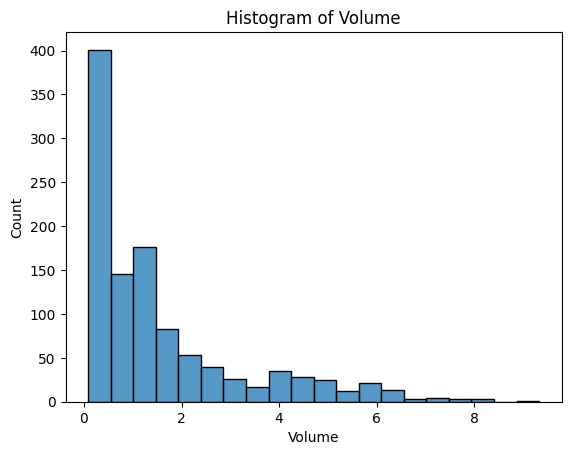

In [62]:
#Visualize the data using graphical summaries
#Histograms
sns.histplot(data=weekly_data, x='Volume', bins=20)
plt.title('Histogram of Volume')
plt.show()

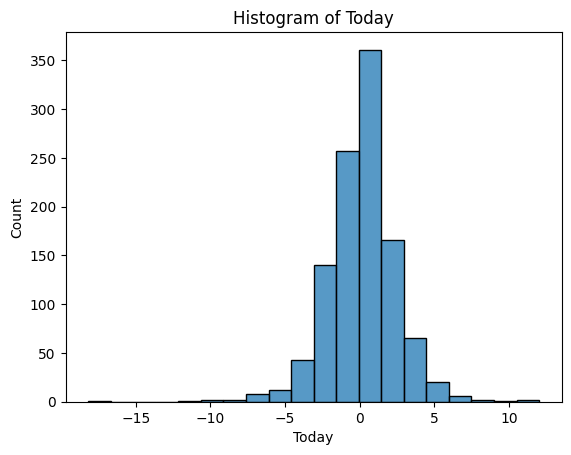

In [63]:
sns.histplot(data=weekly_data, x='Today', bins=20)
plt.title('Histogram of Today')
plt.show()

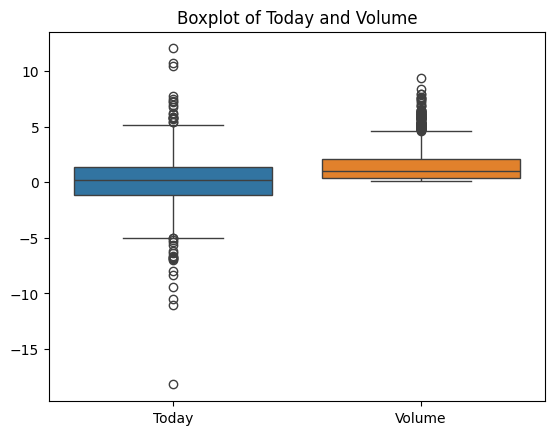

In [64]:
#Boxplot
sns.boxplot(data=weekly_data[['Today', 'Volume']])
plt.title('Boxplot of Today and Volume')
plt.show()

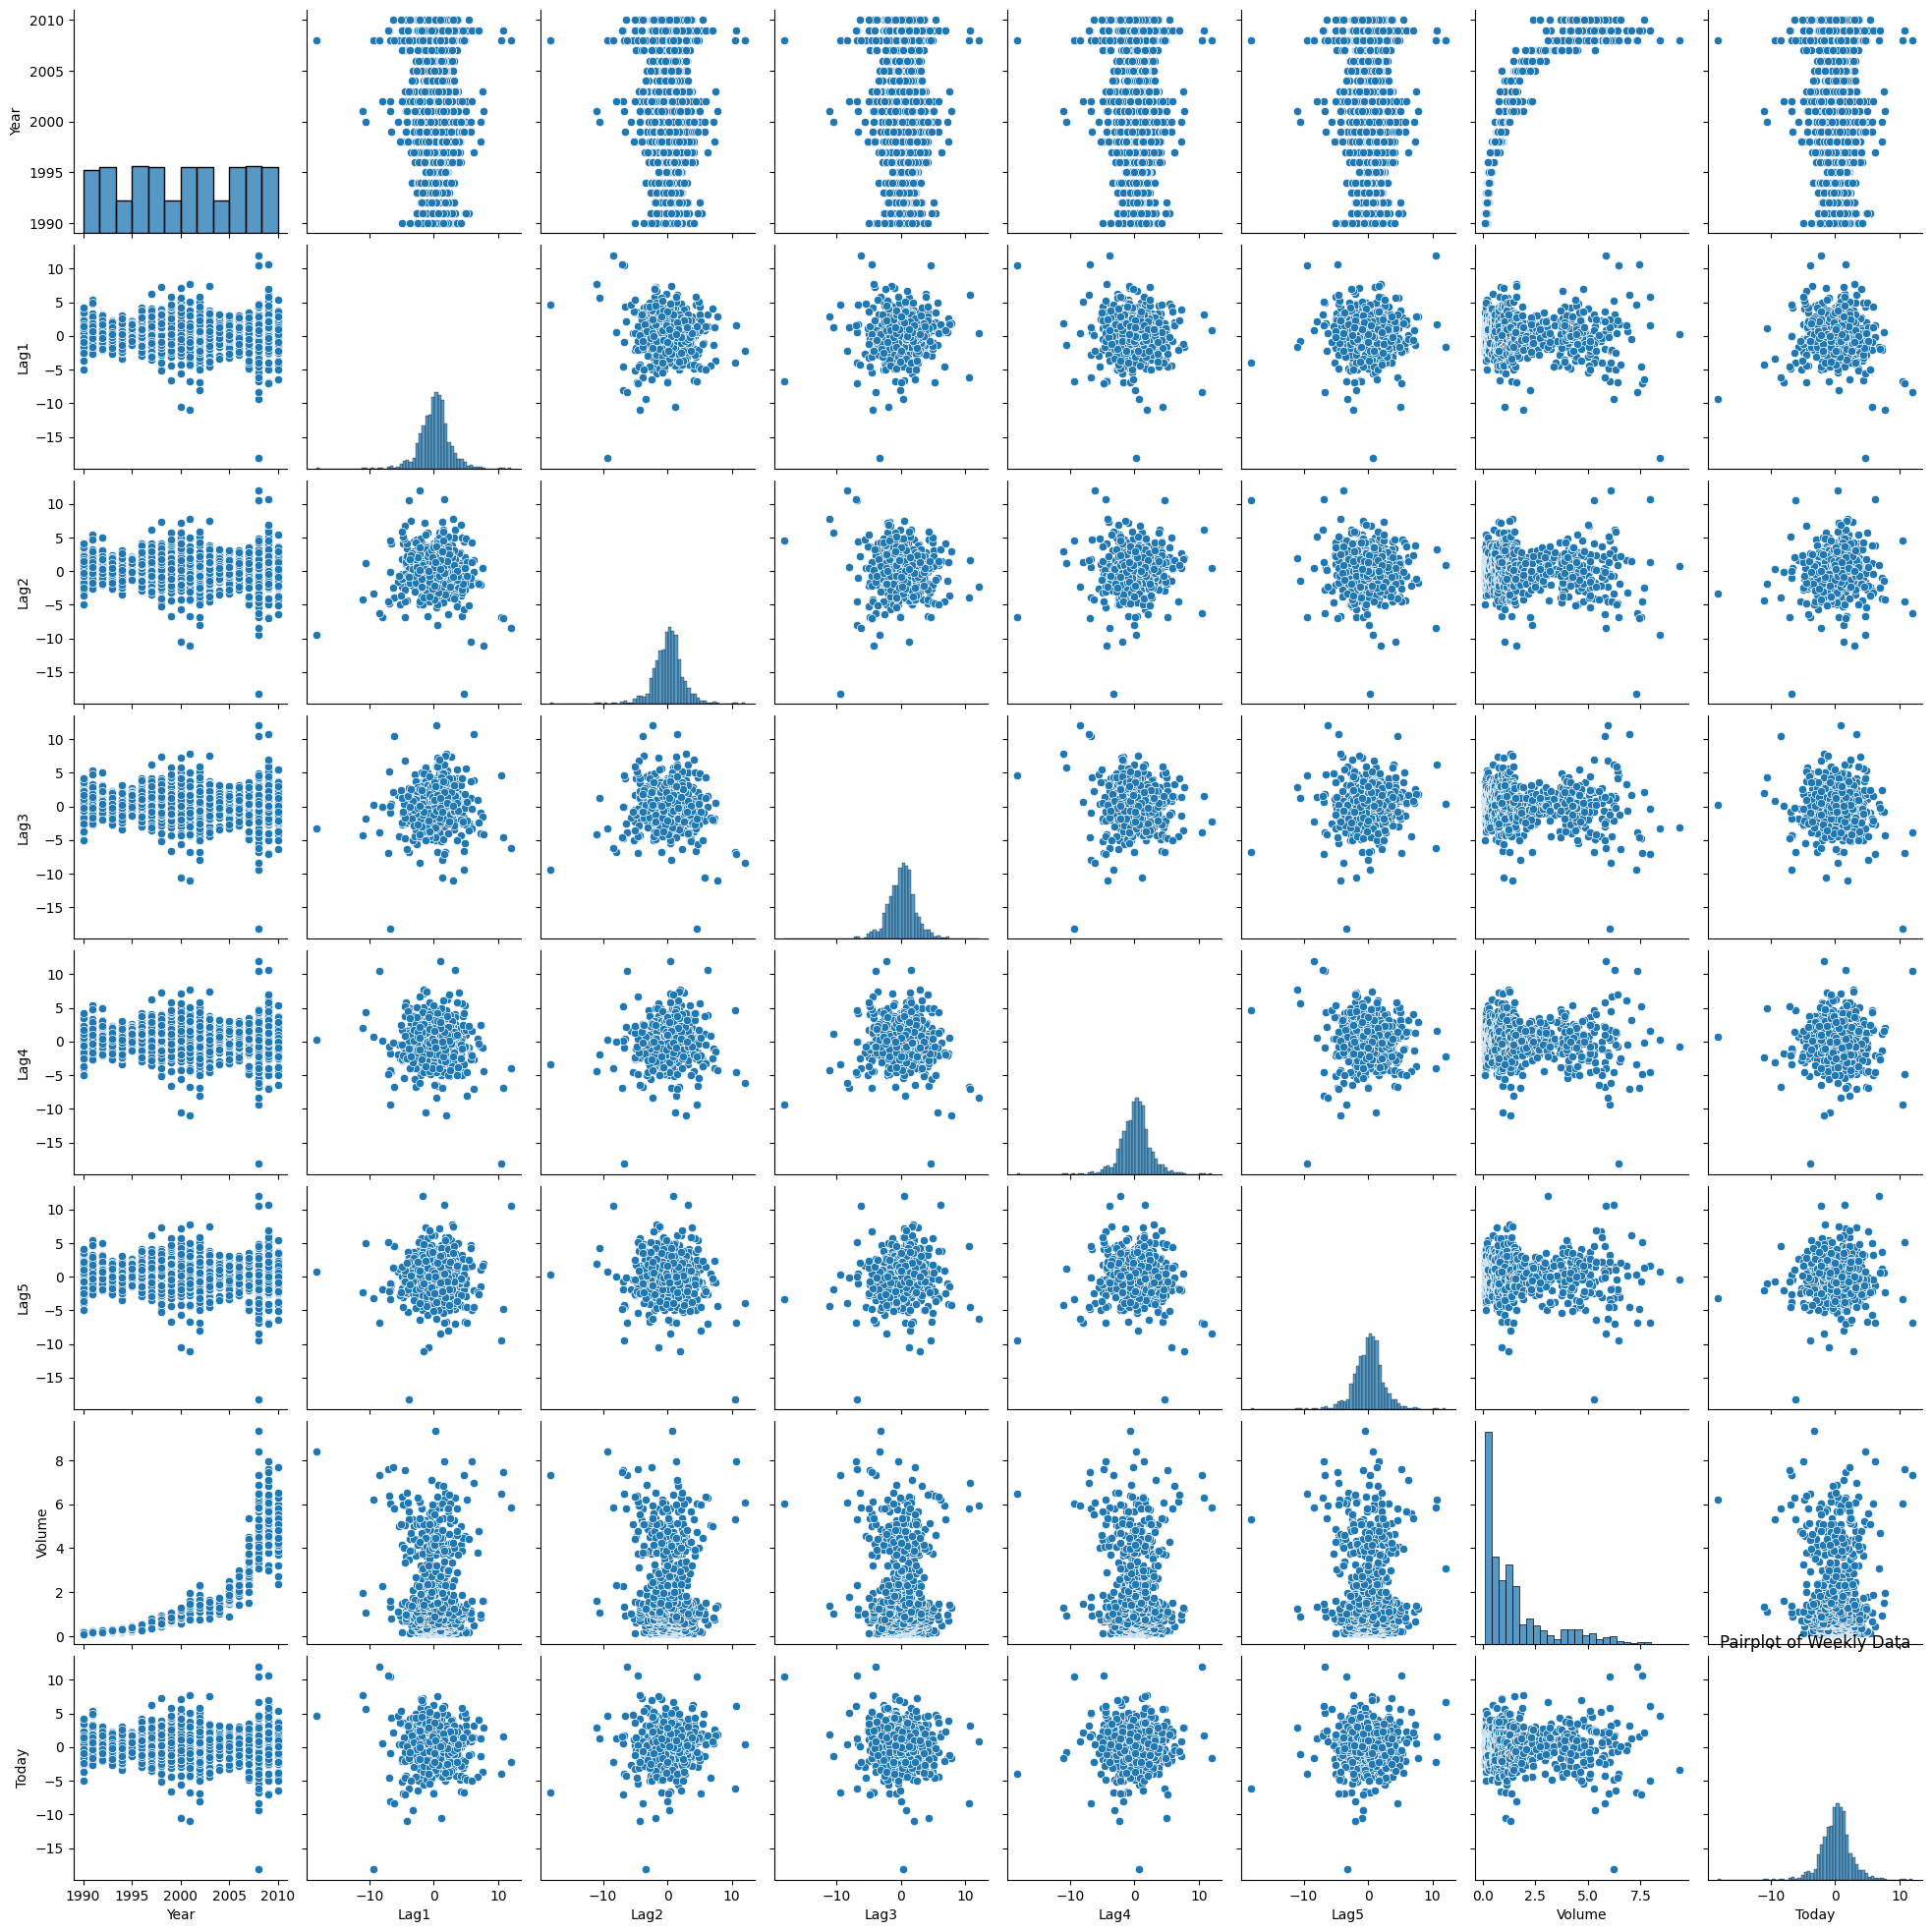

In [65]:
#Pairplot to examine relationships between variables
sns.pairplot(weekly_data)
plt.title('Pairplot of Weekly Data')
plt.show()

In [66]:
#Exclude non-numeric columns before computing correlation matrix
numeric_data = weekly_data.select_dtypes(include=['float64', 'int64'])

In [67]:
#Compute correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


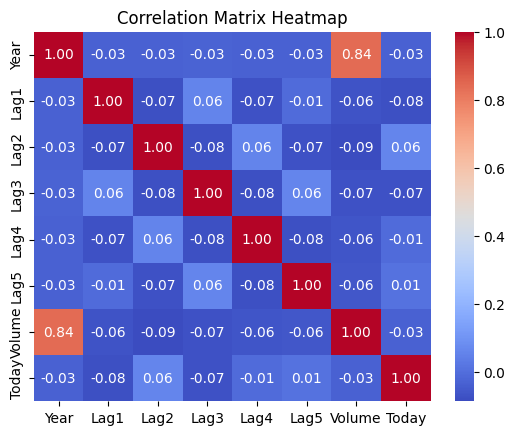

In [68]:
#Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**1.b) Fitted a logistic regression model using the full `Weekly` dataset with `Direction` as the response and the five `Lag` variables plus `Volume` as predictors, reported the model summary, and identified any predictors that were statistically significant.**


In [69]:
import statsmodels.api as sm

#Define the response variable (Direction) and predictor variables
response = weekly_data['Direction']
predictors = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

#Add a constant term to the predictor variables
predictors_with_constant = sm.add_constant(predictors)

#Fit logistic regression model
logit_model = sm.Logit(response.replace({'Up': 1, 'Down': 0}), predictors_with_constant)
result = logit_model.fit()

#Print summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                0.006580
Time:                        17:34:43   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

**1.c) Computed the confusion matrix and overall accuracy for the logistic regression model, and interpreted the types of classification errors indicated by the matrix.**

In [70]:
#Predict probabilities using the fitted logistic regression model
probs = result.predict(predictors_with_constant)

#Initialize predictions as "Down" for all instances
pred_glm = ["Down"] * len(probs)

#Update predictions where probabilities are greater than 0.5 to "Up"
for i, prob in enumerate(probs):
    if prob > 0.5:
        pred_glm[i] = "Up"

#Create a contingency table of predicted values versus true values (Direction)
confusion_table = pd.crosstab(pd.Series(pred_glm, name='Predicted'), pd.Series(response, name='Direction'))

#Calculate accuracy (overall fraction of correct predictions)
accuracy = confusion_table.values.diagonal().sum() / confusion_table.values.sum()

#Print confusion table and accuracy
print("Confusion Matrix:")
print(confusion_table)
print(f"Overall fraction of correct predictions (accuracy): {accuracy:.2f}")

Confusion Matrix:
Direction  Down   Up
Predicted           
Down         54   48
Up          430  557
Overall fraction of correct predictions (accuracy): 0.56


**Observations:**

We may conclude that the percentage of correct predictions on the training data is $(54+557)/1089$ wich is equal to **56.1065197%.** In other words **43.8934803%** is the training error rate, which is often overly optimistic. We could also say that for weeks when the market goes up, the model is right 92.0661157% of the time $(557/(48+557))$. For weeks when the market goes down, the model is right only 11.1570248% of the time $(54/(54+430))$.

**1.d) Fitted a logistic regression model using data from 1990 to 2008 with `Lag2` as the sole predictor, and evaluated performance on the held-out 2009–2010 data using a confusion matrix and overall accuracy.**


In [71]:
#Importing the confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

#Filter data for the specified time periods
training_data = weekly_data[(weekly_data['Year'] >= 1990) & (weekly_data['Year'] <= 2008)]
testing_data = weekly_data[(weekly_data['Year'] >= 2009) & (weekly_data['Year'] <= 2010)]

#Define predictors and response variables for training and testing sets
train_X = training_data[['Lag2']]
train_y = training_data['Direction']
test_X = testing_data[['Lag2']]
test_y = testing_data['Direction']

#Fit logistic regression model using Lag2 as the predictor
logit_model = sm.Logit(train_y.replace({'Up': 1, 'Down': 0}), sm.add_constant(train_X))
result = logit_model.fit()

#Predictions for testing data
test_probs = result.predict(sm.add_constant(test_X)) > 0.5
test_pred_glm = test_probs.map({False: "Down", True: "Up"})

#Compute confusion matrix for testing data
conf_matrix_test = confusion_matrix(test_y.replace({'Up': 1, 'Down': 0}), test_pred_glm.replace({'Up': 1, 'Down': 0}))

#Compute overall fraction of correct predictions for testing data
accuracy_test = accuracy_score(test_y.replace({'Up': 1, 'Down': 0}), test_pred_glm.replace({'Up': 1, 'Down': 0}))

#Print confusion matrix and accuracy for testing data
print("Confusion Matrix for Testing Data:")
print(conf_matrix_test)
print(f"Overall fraction of correct predictions (accuracy) for testing data: {accuracy_test:.2f}")

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix for Testing Data:
[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions (accuracy) for testing data: 0.62


**Observation:**

In this case, we may conclude that the percentage of correct predictions on the test data is $(9+56)/104$ wich is equal to **62.5%.** In other words **37.5%** is the test error rate. We could also say that for weeks when the market goes up, the model is right **91.8032787%** of the time $(56/(56+5))$. For weeks when the market goes down, the model is right only **20.9302326%** of the time $(9/(9+34)
)$.

(1.e) Repeating (1.d) using LDA.

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Fit LDA model using Lag2 as the predictor
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(train_X, train_y)

#Predictions for testing data
lda_predictions = lda_model.predict(test_X)

#Compute confusion matrix for testing data
conf_matrix_lda = confusion_matrix(test_y, lda_predictions)

#Compute overall fraction of correct predictions for testing data
accuracy_lda = accuracy_score(test_y, lda_predictions)

#Print confusion matrix and accuracy for testing data
print("Confusion Matrix for Testing Data (LDA):")
print(conf_matrix_lda)
print(f"Overall fraction of correct predictions (accuracy) for testing data (LDA): {accuracy_lda:.2f}")

Confusion Matrix for Testing Data (LDA):
[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions (accuracy) for testing data (LDA): 0.62


**Observations:**

In this case, we may conclude that the percentage of correct predictions on the test data is **62.5%.** In other words **37.5%** is the test error rate. We could also say that for weeks when the market goes up, the model is right **91.8032787%** of the time. For weeks when the market goes down, the model is right only **20.9302326%** of the time. These results are very close to those obtained with the logistic regression model which is not surpising.

(1.f) Repeating (1.d) using QDA.

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Fit QDA model using Lag2 and Direction as predictors
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_X, train_y)

#Predictions for testing data
qda_pred = qda_model.predict(test_X)

#Compute confusion matrix for testing data
conf_matrix_qda = confusion_matrix(test_y, qda_pred)

#Compute overall fraction of correct predictions for testing data
accuracy_qda = accuracy_score(test_y, qda_pred)

#Print confusion matrix and accuracy for testing data
print("Confusion Matrix for Testing Data (QDA):")
print(conf_matrix_qda)
print(f"Overall fraction of correct predictions (accuracy) for testing data (QDA): {accuracy_qda:.2f}")

Confusion Matrix for Testing Data (QDA):
[[ 0 43]
 [ 0 61]]
Overall fraction of correct predictions (accuracy) for testing data (QDA): 0.59


**Observations:**

In this case, we may conclude that the percentage of correct predictions on the test data is **59.6538462%.** In other words **41.3461538%** is the test error rate. We could also say that for weeks when the market goes up, the model is right **100%** of the time. For weeks when the market goes down, the model is right only **0%** of the time. We may note, that QDA achieves a correctness of **59.6538462%** even though the model chooses “Up” the whole time.

(1.g) Repeating (1.d) using KNN with K=1

In [74]:
from sklearn.neighbors import KNeighborsClassifier

#Fit KNN model with K=1 using Lag2 and Direction as predictors
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_X, train_y)

#Predictions for testing data
knn_pred = knn_model.predict(test_X)

#Compute confusion matrix for testing data
conf_matrix_knn = confusion_matrix(test_y, knn_pred)

#Compute overall fraction of correct predictions for testing data
accuracy_knn = accuracy_score(test_y, knn_pred)

#Print confusion matrix and accuracy for testing data
print("Confusion Matrix for Testing Data (KNN with K=1):")
print(conf_matrix_knn)
print(f"Overall fraction of correct predictions (accuracy) for testing data (KNN with K=1): {accuracy_knn:.2f}")

Confusion Matrix for Testing Data (KNN with K=1):
[[22 21]
 [32 29]]
Overall fraction of correct predictions (accuracy) for testing data (KNN with K=1): 0.49


**Observations:**

In this case, we may conclude that the percentage of correct predictions on the test data is **49%.** In other words **51%** is the test error rate. We could also say that for weeks when the market goes up, the model is right **51.8196721%** of the time. For weeks when the market goes down, the model is right only **49.8372093%** of the time.

**1.h) Compared the performance of the classification methods applied to the `Weekly` dataset and identified which method yielded the best predictive results.**

We already computed the accuracy for each method when performing their respective tasks. We can compare the accuracy scores to determine which method performed the best on this data. The method with the highest accuracy score is considered to provide the best results.

Let's summarize the accuracy scores obtained from each method:

*Logistic Regression:* **Accuracy score = 0.62/62.5%**

*LDA:* **Accuracy score = 0.62/62.5%**

*QDA:* **Accuracy score = 0.59/59.6538462%**

*KNN with K=1:* **Accuracy score = 0.49/49.8372093%**

If we compare the test error rates, we see that *logistic regression and LDA have the minimum error rates*, followed by QDA and KNN.

**Q2) Loaded the `Auto` dataset to develop a classification model predicting whether a car has high or low gas mileage**

In [75]:
import pandas as pd

#Load the Auto dataset
auto_data = pd.read_csv('Auto.csv')

#Display the first few rows of the dataset
print(auto_data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


**Q2.a) Created a binary variable `mpg01` equal to 1 if `mpg` exceeds its median and 0 otherwise, and combined it with the other `Auto` dataset variables into a single DataFrame for classification.**

In [76]:
import pandas as pd

#Load the Auto dataset
auto_data = pd.read_csv('Auto.csv')

#Calculate the median of the mpg column
mpg_median = auto_data['mpg'].median()

#Create mpg01 variable based on whether mpg is above or below its median
auto_data['mpg01'] = (auto_data['mpg'] > mpg_median).astype(int)

#Display the first few rows of the dataset with mpg01 variable
print(auto_data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0  


**2.b) Explored the relationship between `mpg01` and the other features using scatterplots and boxplots, and identified which variables appear most predictive of high versus low gas mileage.**


In [77]:
import numpy as np
import pandas as pd

#Convert '?' to NaN and drop rows with missing values
auto_data_numeric = auto_data.replace('?', np.nan).dropna()

#Filter numeric columns
numeric_columns = auto_data_numeric.select_dtypes(include=np.number).columns

#Exclude the 'mpg01' column from the correlation calculation
numeric_columns = numeric_columns.drop('mpg01')

#Calculate the correlation matrix
auto_corr = auto_data_numeric[numeric_columns].corr()

#Print the correlation matrix
print(auto_corr)

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.777618     -0.805127 -0.832244      0.423329   
cylinders    -0.777618   1.000000      0.950823  0.897527     -0.504683   
displacement -0.805127   0.950823      1.000000  0.932994     -0.543800   
weight       -0.832244   0.897527      0.932994  1.000000     -0.416839   
acceleration  0.423329  -0.504683     -0.543800 -0.416839      1.000000   
year          0.580541  -0.345647     -0.369855 -0.309120      0.290316   
origin        0.565209  -0.568932     -0.614535 -0.585005      0.212746   

                  year    origin  
mpg           0.580541  0.565209  
cylinders    -0.345647 -0.568932  
displacement -0.369855 -0.614535  
weight       -0.309120 -0.585005  
acceleration  0.290316  0.212746  
year          1.000000  0.181528  
origin        0.181528  1.000000  


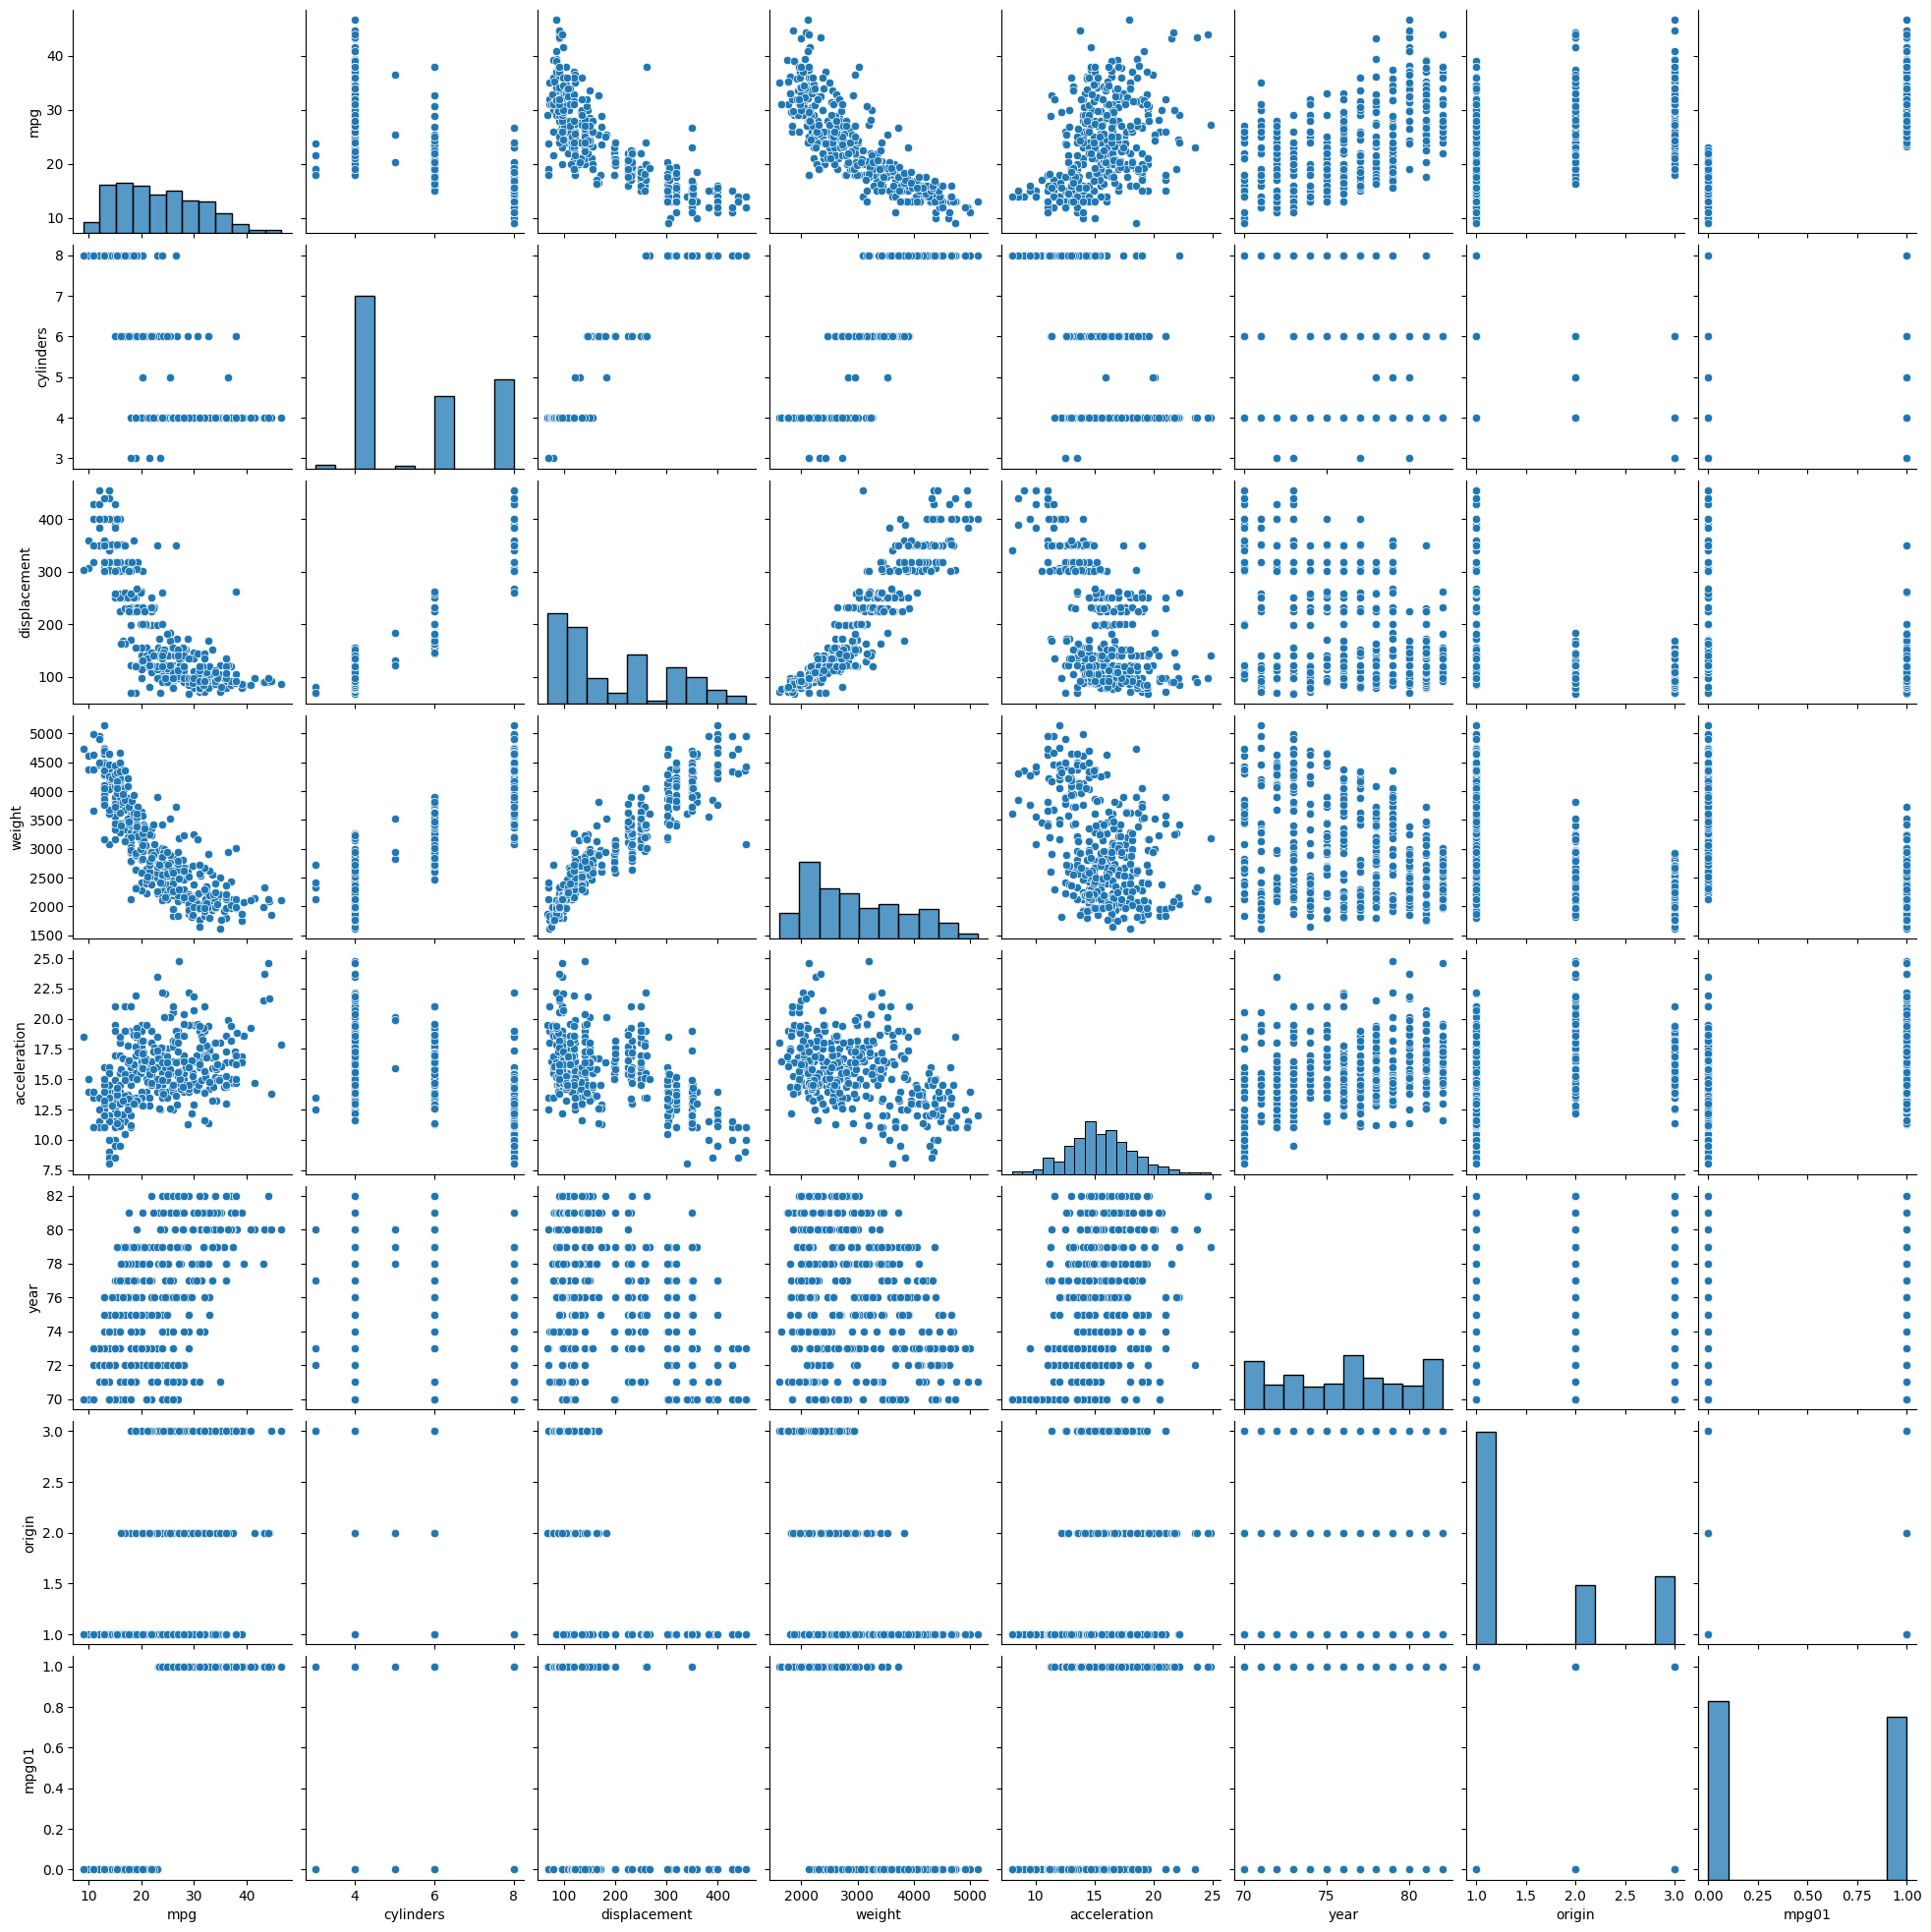

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a pairplot
sns.pairplot(auto_data_numeric)
plt.show()

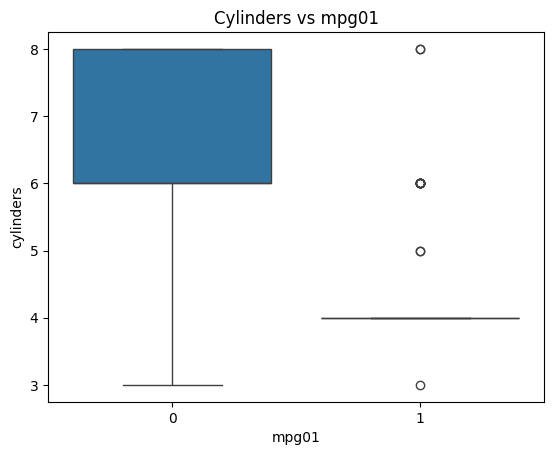

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='cylinders', data=auto_data_numeric)
plt.title('Cylinders vs mpg01')
plt.show()

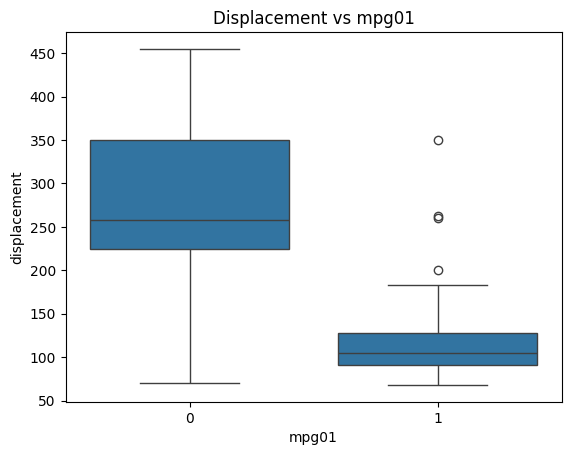

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='displacement', data=auto_data_numeric)
plt.title('Displacement vs mpg01')
plt.show()

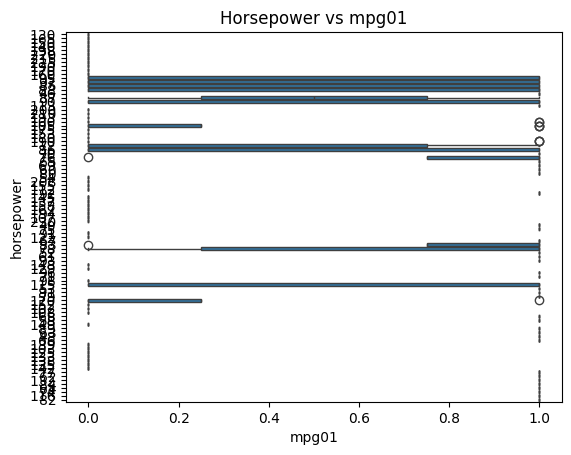

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='horsepower', data=auto_data_numeric)
plt.title('Horsepower vs mpg01')
plt.show()

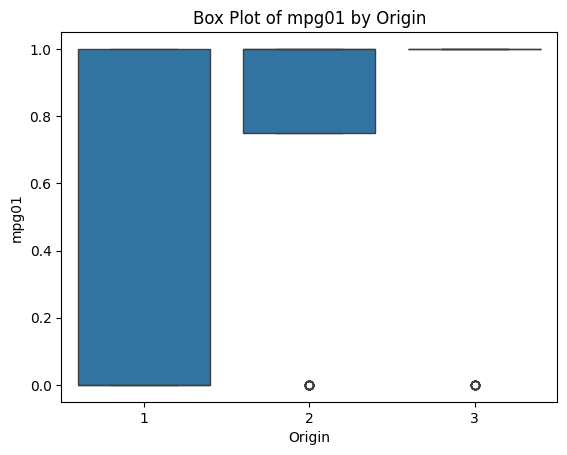

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot of mpg01 grouped by origin
sns.boxplot(x='origin', y='mpg01', data=auto_data_numeric)
plt.title('Box Plot of mpg01 by Origin')
plt.xlabel('Origin')
plt.ylabel('mpg01')
plt.show()

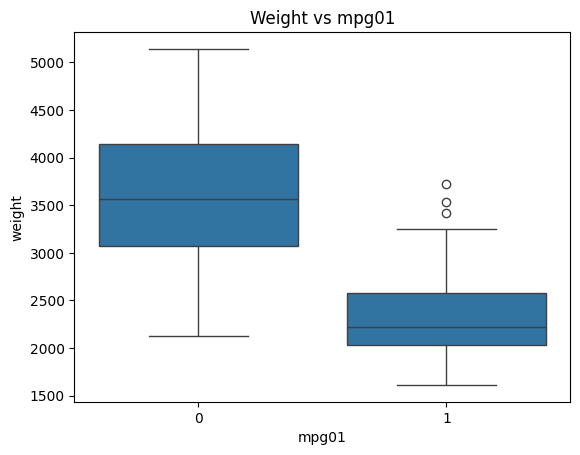

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='weight', data=auto_data_numeric)
plt.title('Weight vs mpg01')
plt.show()

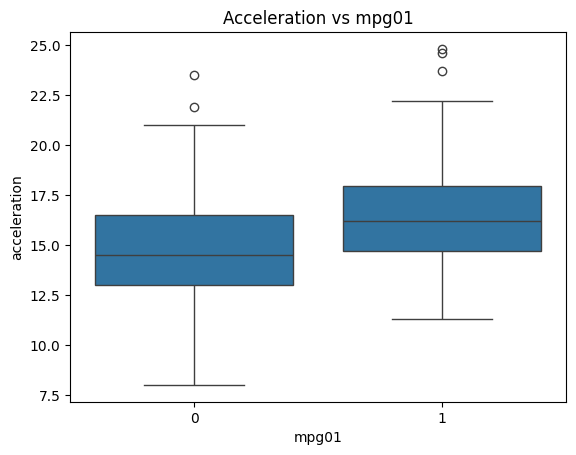

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='acceleration', data=auto_data_numeric)
plt.title('Acceleration vs mpg01')
plt.show()

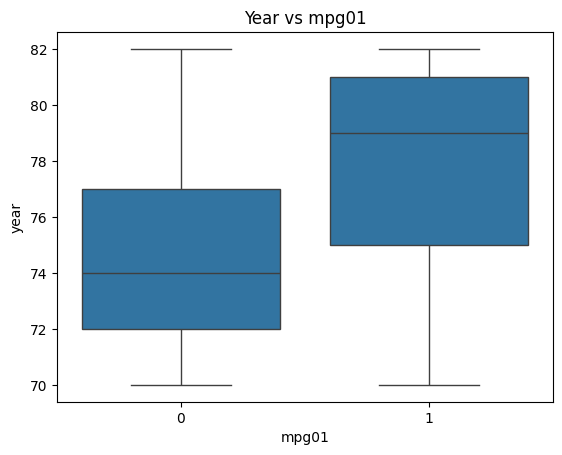

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a box plot
sns.boxplot(x='mpg01', y='year', data=auto_data_numeric)
plt.title('Year vs mpg01')
plt.show()

**Observation:**

We may conclude that there exists some association between “mpg01” and “cylinders”, “weight”, “displacement” and “horsepower”.

**2.c) Splitting the data into a training set and a test set (70%, 30%).**

Using `random.seed(4)` to make the training data reproducible.

In [86]:
from sklearn.model_selection import train_test_split
import numpy as np

#Set random seed for reproducibility
np.random.seed(4)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(auto_data_numeric.drop(columns=['mpg01']), auto_data_numeric['mpg01'], test_size=0.3)

#Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (274, 9) (274,)
Testing set shape: (118, 9) (118,)


**2.d) Performed Linear Discriminant Analysis (LDA) on the training set to predict `mpg01` using the variables identified as most associated in (2.b), and reported the test error.**

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#Select the features that seemed most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

#Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[selected_features])
X_test_imputed = imputer.transform(X_test[selected_features])

#Fit LDA model on the training data using selected features
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_imputed, y_train)

#Predict mpg01 on the test data
lda_pred = lda_model.predict(X_test_imputed)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, lda_pred)

#Calculate test error as a percentage
test_error_percentage = (1 - accuracy) * 100
print("Test error of the LDA model:", test_error_percentage, "%")

Test error of the LDA model: 11.864406779661019 %


**2.e) Performed Quadratic Discriminant Analysis (QDA) on the training set to predict `mpg01` using the variables identified as most associated in (2.b), and reported the test error.**

In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.impute import SimpleImputer

#Initialize SimpleImputer to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

#Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train[selected_features])
X_test_imputed = imputer.transform(X_test[selected_features])

#Fit QDA model on the training data
fit_qda = QuadraticDiscriminantAnalysis()
fit_qda.fit(X_train_imputed, y_train)

#Print the fitted QDA model
print(fit_qda)

#Predict mpg01 on the test data
pred_qda = fit_qda.predict(X_test_imputed)

#Calculate the mean error rate
mean_error_rate_qda = np.mean(pred_qda != y_test)
print("Mean error rate:", mean_error_rate_qda)

QuadraticDiscriminantAnalysis()
Mean error rate: 0.11864406779661017


**2.f) Performed logistic regression on the training set to predict `mpg01` using the variables identified as most associated in (2.b), and reported the test error.**

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Replace '?' with NaN
auto_data_numeric = auto_data.replace('?', np.nan)

#Drop rows with missing values
auto_data_numeric.dropna(inplace=True)

#Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(auto_data_numeric[selected_features], auto_data_numeric['mpg01'], test_size=0.3, random_state=42)

#Initialize logistic regression model
logistic_model = LogisticRegression()

#Fit logistic regression model on the training data
logistic_model.fit(X_train, y_train)

#Predict mpg01 on the test data
logistic_pred = logistic_model.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, logistic_pred)

#Calculate test error as a percentage
test_error_percentage = (1 - accuracy) * 100
print("Test error of the logistic regression model:", test_error_percentage, "%")

Test error of the logistic regression model: 15.254237288135597 %
